In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from tools import *
from sklearn.preprocessing import MinMaxScaler

c:\Users\benjo\anaconda3\envs\lipreadGPU\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data_raw = read_merged_data()

Opening UoB_Set01_2025-01-02tapes.csv


c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19\tools.py:218: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bids_asks = df_bids_asks.applymap(lambda x: x[1:-1].replace(",","") if isinstance(x, str) else "")


In [4]:
data = pd.DataFrame(data_raw[0])[:2000]
# remove rows where last tapes price is nan
data = data.dropna(subset=["Last Tapes Price"])
data_scaled = data.copy()

scaler = MinMaxScaler(feature_range=(0,1))
# scale last tapes price
data_scaled["Last Tapes Price"] = scaler.fit_transform(data["Last Tapes Price"].values.reshape(-1,1))

# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len]
test_data = data[training_data_len:]
train_scaled_data = data_scaled[:training_data_len]
test_scaled_data = data_scaled[training_data_len:]
print(len(train_data), len(test_data))

 # Selecting tapes Price values
dataset_train = train_scaled_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
scaled_train = np.reshape(dataset_train, (-1,1)) 

# Selecting tapes Price values
dataset_test = test_scaled_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
scaled_test = np.reshape(dataset_test, (-1,1))  


1592 398


In [5]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

X_test = []
y_test = []
for i in range(window, len(scaled_test)):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i, 0])

# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

[array([0.86363636, 0.89393939, 1.        , 0.86363636, 0.86363636,
       0.86363636, 0.86363636, 0.86363636, 0.77272727, 0.71212121,
       0.71212121, 0.72727273, 0.70779221, 0.70779221, 0.87878788,
       0.87878788, 0.62121212, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.68181818, 0.55454545, 0.50909091, 0.50909091,
       0.50909091, 0.5       , 0.5       , 0.5       , 0.40909091,
       0.40909091, 0.29545455, 0.43939394, 0.45454545, 0.45454545,
       0.81818182, 0.72727273, 0.6969697 , 0.6969697 , 0.68181818,
       0.68181818, 0.68181818, 0.68181818, 0.59090909, 0.59090909,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.54545455, 0.54545455, 0.54545455, 0.68181818, 0.68181818])]
[0.6818181818181817]

[array([0.86363636, 0.89393939, 1.        , 0.86363636, 0.86363636,
       0.86363636, 0.86363636, 0.86363636, 0.77272727, 0.71212121,
       0.71212121, 0.72727273, 0.707

In [6]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics

In [7]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
1532/1532 [==============================] - 63s 32ms/step - loss: 0.0213 - accuracy: 0.0059
Epoch 2/12
1532/1532 [==============================] - 45s 30ms/step - loss: 0.0134 - accuracy: 0.0059
Epoch 3/12
1532/1532 [==============================] - 41s 27ms/step - loss: 0.0127 - accuracy: 0.0059
Epoch 4/12
1532/1532 [==============================] - 41s 27ms/step - loss: 0.0130 - accuracy: 0.0059
Epoch 5/12
1532/1532 [==============================] - 41s 26ms/step - loss: 0.0125 - accuracy: 0.0059
Epoch 6/12
1532/1532 [==============================] - 38s 25ms/step - loss: 0.0126 - accuracy: 0.0059
Epoch 7/12
1532/1532 [==============================] - 25s 16ms/step - loss: 0.0126 - accuracy: 0.0059
Epoch 8/12
1532/1532 [==============================] - 19s 13ms/step - loss: 0.0124 - accuracy: 0.0059
Epoch 9/12
1532/1532 [==============================] - 19s 13ms/step - loss: 0.0124 - accuracy: 0.0059
Epoch 10/12
1532/1532 [==============================] - 20s 13m

In [8]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM)

11/11 [==============================] - 1s 13ms/step


In [9]:
y_test_O = scaler.inverse_transform(y_test)
print("LSTM MAE:", metrics.mean_absolute_error(y_test_O, y_LSTM_O))
print("LSTM MSE:", metrics.mean_squared_error(y_test_O, y_LSTM_O))


LSTM MAE: 1.4338919979024989
LSTM MSE: 6.1099792251721015


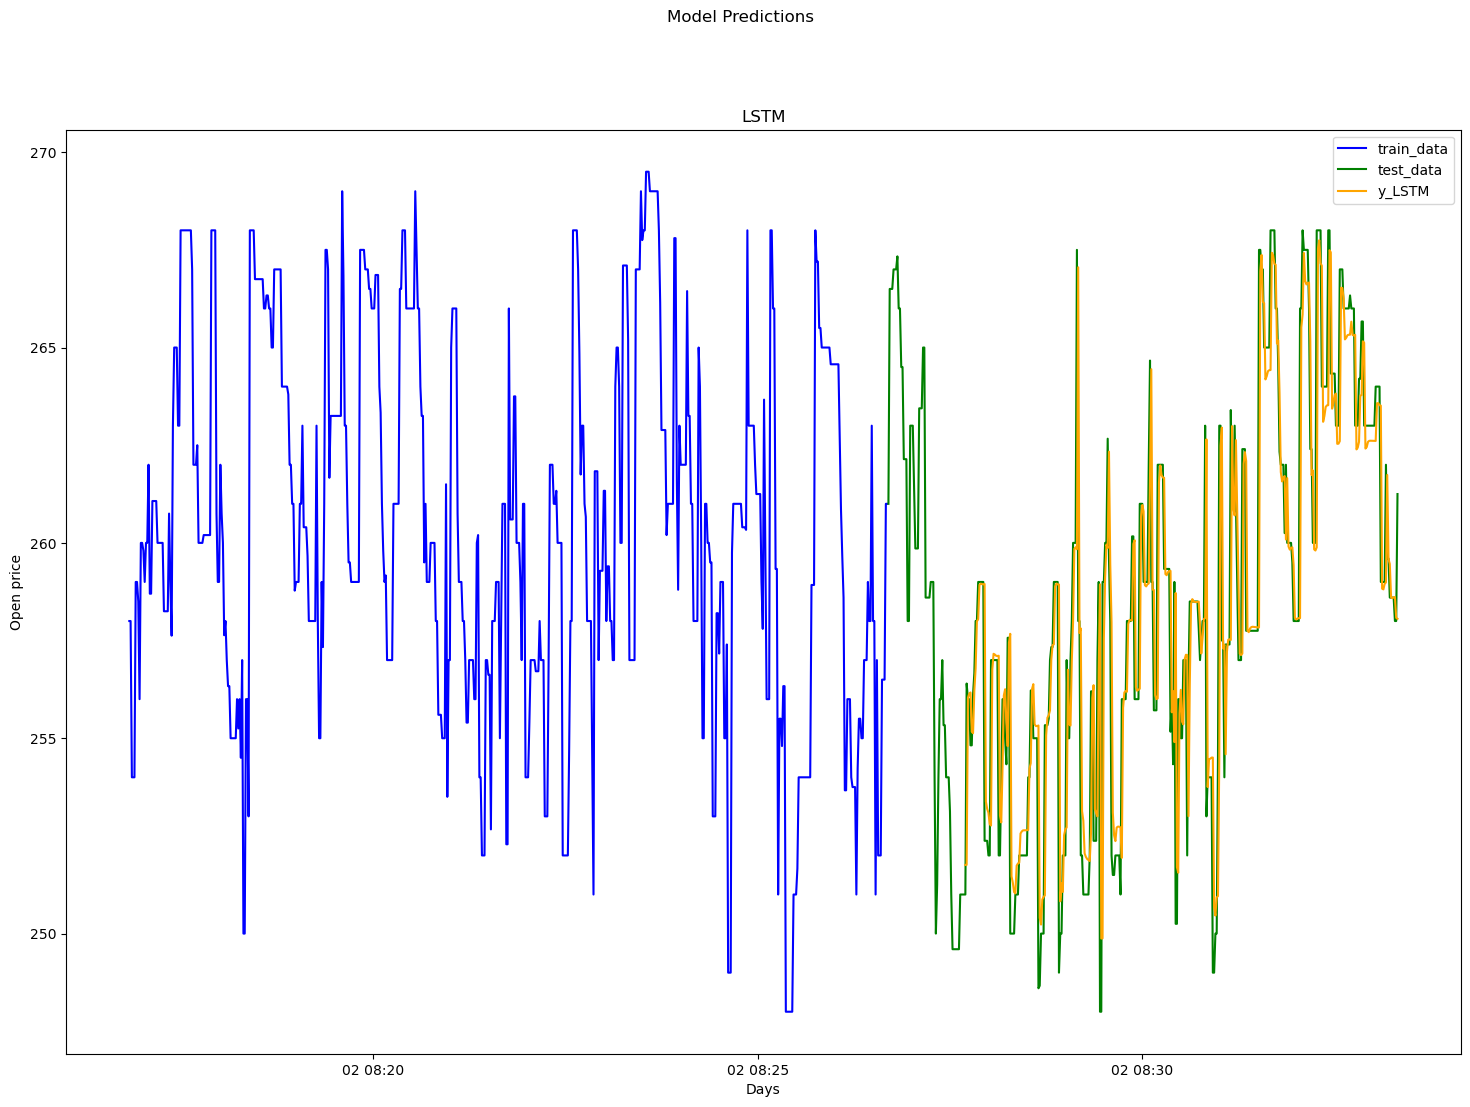

In [10]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index[1000:], train_data["Last Tapes Price"][1000:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs.plot(test_data.index[window:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")

plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()

Stationary Predicted Count: 186
Stationary Actual Count: 198
Stationary Correct Count: 102
Upwards Predicted Count: 83
Upwards Actual Count: 71
Upwards Correct Count: 14
Downwards Predicted Count: 68
Downwards Actual Count: 68
Downwards Correct Count: 12
0.3798219584569733


<AxesSubplot: xlabel='combined_time'>

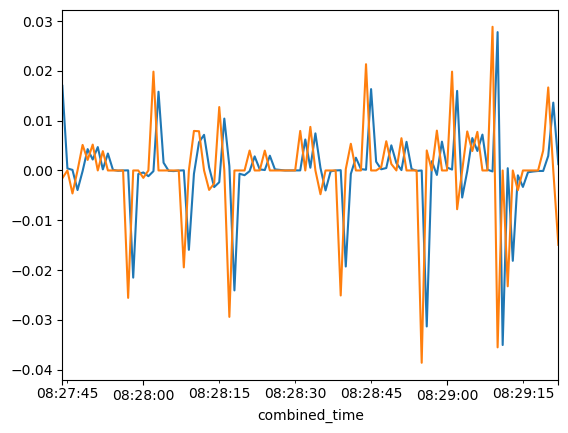

In [11]:
# check how many times signal has correctly predicted movement of actual price

# !!need to ensure that the price movement in in % values not absolute!!

# get actual price movement
actual_diff = test_data["Last Tapes Price"].pct_change().dropna()[window:]

pred = pd.DataFrame(y_LSTM_O, index = test_data.index[window:], columns = ["Last Tapes Price"])
diff = pred["Last Tapes Price"].pct_change().dropna()

threshold = 0.001 # 0.1% trading fee threshold

# check if both are over 1/100 of a % increase
up_correct = (diff>threshold) & (actual_diff>threshold)
down_correct = (diff<-threshold) & (actual_diff<-threshold)
stationary_correct = ((diff<=threshold) & (diff>-threshold)) & ((actual_diff<=threshold) & (actual_diff>-threshold))

print(f"Stationary Predicted Count: {sum((diff<=threshold) & (diff>-threshold))}")
print(f"Stationary Actual Count: {sum(((actual_diff<=threshold) & (actual_diff>-threshold)))}")
print(f"Stationary Correct Count: {sum(stationary_correct)}")

#correct = diff_high*actual_diff > 0 # correct if direction is the same
#print(f"Stationary Predicted Count: {sum(diff_high== 0)}")
#print(f"Stationary Actual Count: {sum(actual_diff== 0)}")
# must also check if both are zero
#correct = correct | (diff_high == 0) & (actual_diff == 0)

correct = up_correct | down_correct | stationary_correct
print(f"Upwards Predicted Count: {sum(diff>threshold)}")
print(f"Upwards Actual Count: {sum(actual_diff>threshold)}")
print(f"Upwards Correct Count: {sum(up_correct)}")
print(f"Downwards Predicted Count: {sum(diff<-threshold)}")
print(f"Downwards Actual Count: {sum(actual_diff<-threshold)}")
print(f"Downwards Correct Count: {sum(down_correct)}")
print(correct.sum()/len(correct))

diff[1:100].plot()  
actual_diff[1:100].plot()